In [128]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [129]:
df=pd.read_csv("work_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 3 columns):
Date      3007 non-null object
Close     3007 non-null float64
Volume    3007 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 70.6+ KB


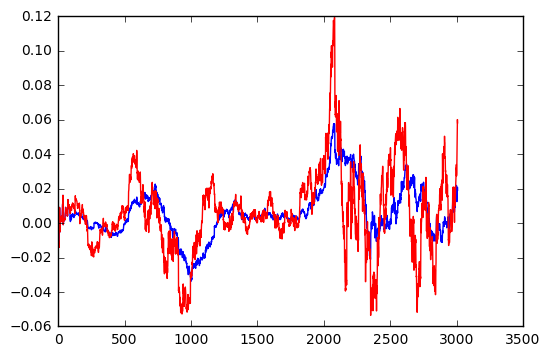

In [130]:
df.long_sma=df.Close.rolling(window=270,center=False,min_periods=0).mean()
df.short_sma=df.Close.rolling(window=90,center=False,min_periods=0).mean()
plt.plot(df.long_sma.diff(),'b')
plt.plot(df.short_sma.diff(),'r')

In [131]:
df["signal"]=pd.Series(
    np.where(
        (df.short_sma>df.short_sma.shift(1))
        & 
        (df.short_sma<df.long_sma),
        1,
        0
    ).tolist()
)

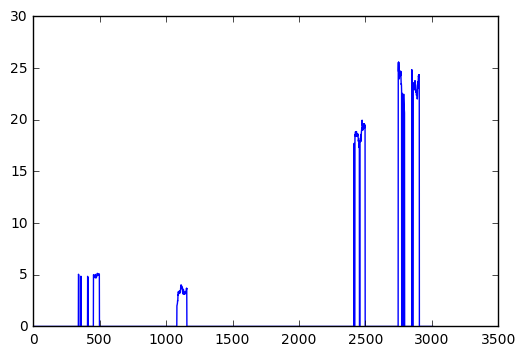

In [137]:
df["return"]=df.Close*df["signal"].shift(1)
plt.plot(df["return"])


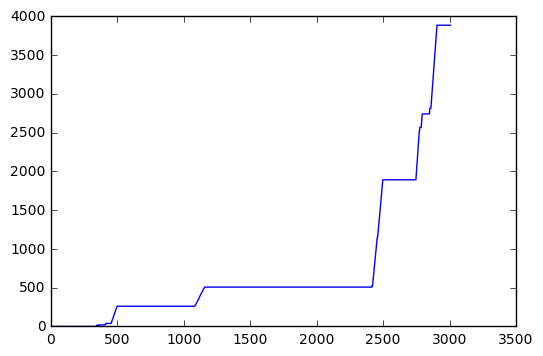

In [133]:
df["cum_rtn"]=df["return"].cumsum()
plt.plot(df["cum_rtn"])